In [17]:
#### import sys
import numpy as np
import cv2
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
import pickle

import logging
logging.basicConfig(level=logging.INFO)
p1 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCal')
p3 = os.path.join('../../','raw','CookIRCamET','Images','CprlIRCal')
p5 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir2')
p7 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlir3')
p9 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlirV2')
p11 = os.path.join('../../','raw','CookIRCamET','Images','NsarIRCalFlirField')
p13 = os.path.join('../../','work','CookIRCamET','Working')

In [18]:
T_ir=[]
T_bb=[]
T_ir_field=[]
T_bb_field=[]

for f in np.sort(os.listdir(p11)):
    if 'ir' in f: 
        if f=='27_1_ir.png' or f=='32_1_ir.png':
            i=56
            di=2
            j=96
            dj=2
            ir = cv2.imread(os.path.join(p11,f),cv2.IMREAD_UNCHANGED)          
            T_bb_field.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
            T_ir_field.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))
        else:
            i=66
            di=10
            j=116
            dj=10
            ir = cv2.imread(os.path.join(p11,f),cv2.IMREAD_UNCHANGED)
            T_bb.append(int(f.split('.png')[0].split('_')[0])+int(f.split('.png')[0].split('_')[1])/10+273.15)
            T_ir.append(np.mean(ir[i-di:i+di,j-dj:j+dj]))

ind=np.argsort(np.array(T_ir))

In [19]:
T_ir=np.array(T_ir)[ind].reshape((-1,1))
T_bb=np.array(T_bb)[ind].reshape((-1,1))
T_bb_field=np.array(T_bb_field)
T_ir_field=np.array(T_ir_field)

In [20]:
I0=T_ir[8]
I1=T_ir[9]

In [21]:
outliers = [10,14]

In [22]:
T_ir=np.delete(T_ir,outliers).reshape((-1,1))
T_bb=np.delete(T_bb,outliers).reshape((-1,1))

In [27]:
model0 = LinearRegression()
model0.fit(T_ir[0:9],T_bb[0:9])
model1 = LinearRegression()
model1.fit(T_ir[8:10],T_bb[8:10])
model2 = LinearRegression()
model2.fit(T_ir[9:],T_bb[9:])

LinearRegression()

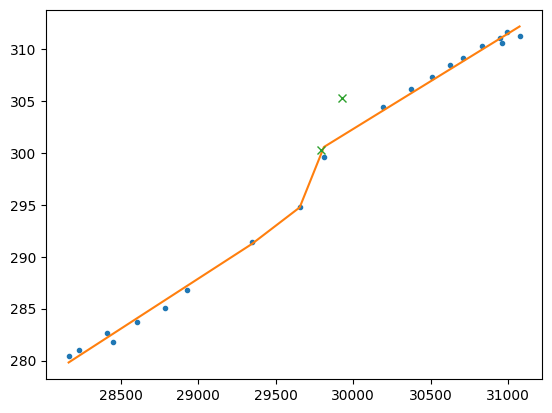

In [28]:
T_pred = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])


plt.plot(T_ir,T_bb,'.',T_ir,T_pred,T_ir_field,T_bb_field,'x')

In [29]:
with open(os.path.join(p13,'calibration_nsar_pwlf.pk.sav'), 'wb') as f:  # Python 3: open(..., 'wb'
    pickle.dump([model0, model1, model2, I0, I1], f)

In [ ]:
p0 = os.path.join('../../','raw','CookIRCamET','Images','CookHY2023','V1')
for f in np.flip(np.sort(os.listdir(p0))):
    if 'ir' in f:
        T_ir = cv2.imread(os.path.join(p0,f),cv2.IMREAD_UNCHANGED)
               
        T_ir = np.piecewise(T_ir, [T_ir < I0, (T_ir>=I0) & (T_ir<I1), T_ir>=I1], [lambda x: model0.intercept_[0]+model0.coef_[0][0]*x, lambda x: model1.intercept_[0]+model1.coef_[0][0]*x, lambda x: model2.intercept_[0]+model2.coef_[0][0]*x])
        print(f)
        plt.imshow(T_ir)

        plt.colorbar()
        plt.show()
        